In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Наложение и удаление шума

In [23]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

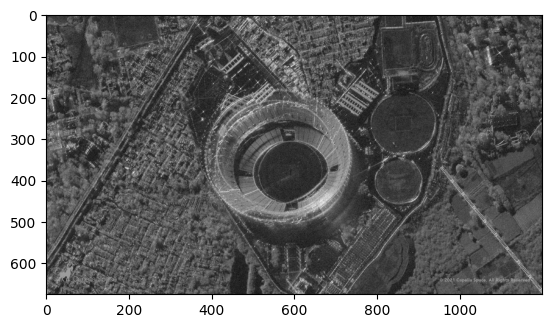

In [24]:
plt.imshow(image_gray, cmap="gray")

In [25]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0, 158,   0, ...,   0,   0,   0],
       [190,   0,   0, ...,  59,  39,  29],
       [  0,  89,   0, ...,   0,  58, 103],
       ...,
       [  0,   0,   0, ..., 249,  43,   0],
       [  0, 149,  94, ...,   4,  26,   0],
       [  0,  45,   0, ...,   0,   0,  16]],
      shape=(675, 1200), dtype=uint8)

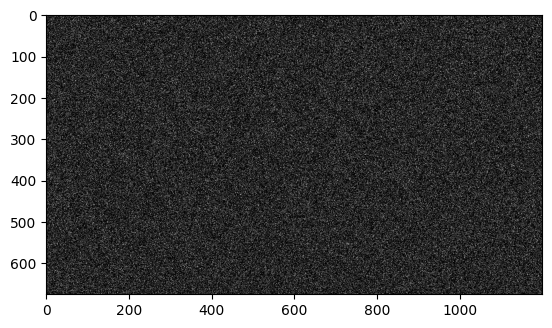

In [26]:
plt.imshow(noise_gauss, cmap="gray")

In [27]:
# Salt and pepper
noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [28]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [29]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

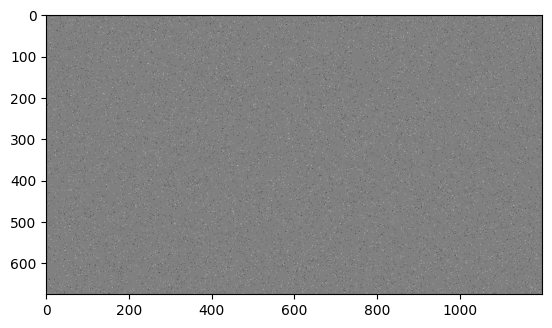

In [30]:
plt.imshow(bg_image, cmap="gray")

In [31]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

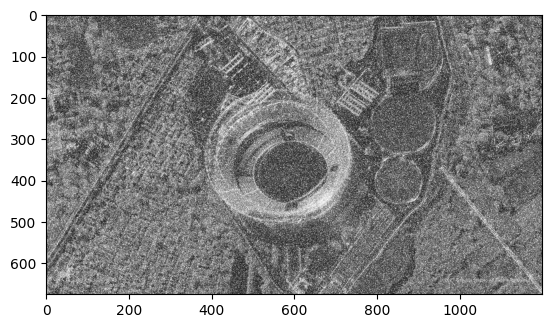

In [32]:
plt.imshow(image_noise_gauss, cmap="gray")

In [33]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

4240.913701234568 0.1875536742544576


In [34]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [35]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)

In [36]:
print(mse_gauss_median, ssim_gauss_median)

1039.344149382716 0.4289950150324666


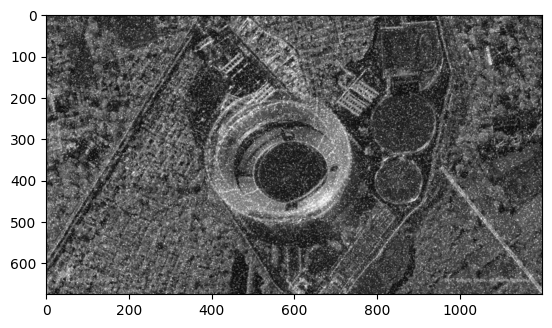

In [37]:
plt.imshow(image_gauss_median, cmap="gray")

In [38]:
import copy

image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

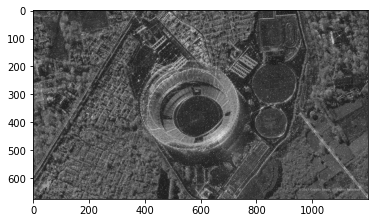

In [95]:
plt.imshow(image_sp, cmap="gray")

In [96]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

387.02924320987654 0.7229272028218258


In [101]:
image_sp_median = cv2.medianBlur(image_sp, 3)

In [102]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.94404444444444 0.8160796293211554


# Другие типы фильтров

In [131]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [133]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [139]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [147]:
import math

def geom(a):
    prod = 1
    for i in range(a.shape[0]):
        prod1 = 1
        for j in range(a.shape[1]):
            prod1 *= a[i,j]
        prod1 = math.pow(prod1, 1.0/9.0)
        prod *= prod1
    return prod

def proc(img, filter):
    img_res = copy.deepcopy(img)
    for i in range(0,img.shape[0] -2):
        for j in range(0,img.shape[1] -2):
            img_res[i:i+3, j:j+3] = filter(img[i:i+3, j:j+3])
    return img_res
    
res = proc(image_noise_gauss, geom)


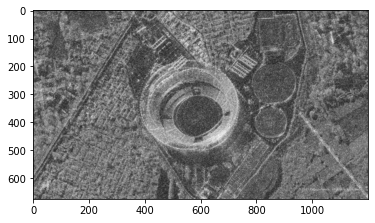

In [148]:
plt.imshow(res, cmap="gray")

In [149]:
mse_geom = mean_squared_error(image_gray, res)
(ssim_geom, diff) = structural_similarity(image_gray, res, full=True)
print(mse_geom, ssim_geom)

1219.7879691358025 0.3984170557811386



# 2D свертка

In [105]:
# averaging filter
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
# blured_image = cv2.blur(img,(5,5))
image_b5 = cv2.blur(image_gray,(5,5))

In [106]:
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

0.0 1.0


In [127]:
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)

In [128]:
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl) 

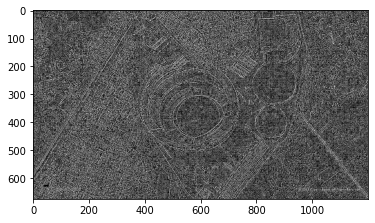

In [129]:
plt.imshow(image_lapl, cmap="gray")

In [5]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [39]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy

In [40]:
# Зашумить изображение при помощи шума гаусса, постоянного шума.

In [41]:
image = cv2.imread('img.jpg')

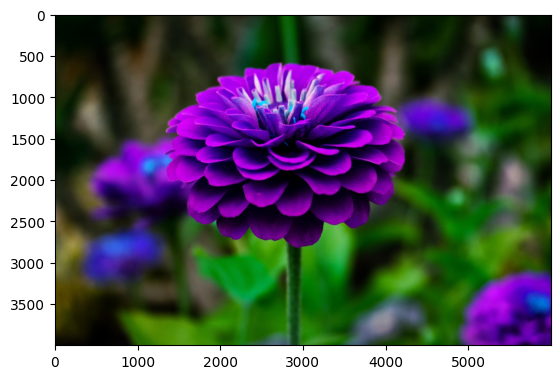

In [42]:
plt.imshow(image)

In [43]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[[ 98,   0,   0],
        [162,   0,   0],
        [173,   0,   0],
        ...,
        [168,   0,   0],
        [136,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [ 16,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [ 86,   0,   0],
        [  0,   0,   0],
        ...,
        [ 21,   0,   0],
        [ 21,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  7,   0,   0],
        [160,   0,   0],
        [135,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [ 16,   0,   0],
        ...,
        [  0,   0,   0],
        [ 19,   0,   0],
        [103,   0,   0]],

       [[ 45,   0,   0],
        [122,   0,   0],
        [255,   0,   0],
        ...,
        [ 30,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

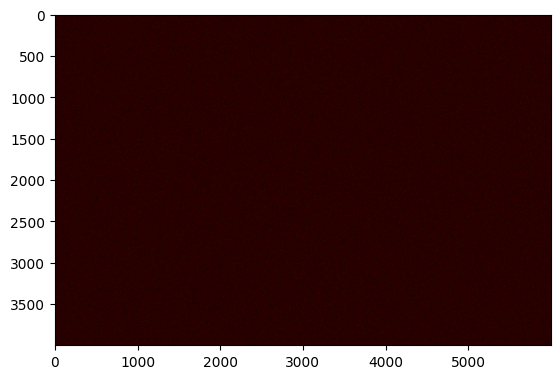

In [44]:
plt.imshow(noise_gauss)

In [45]:
image_noise_gauss = cv2.add(image,noise_gauss)

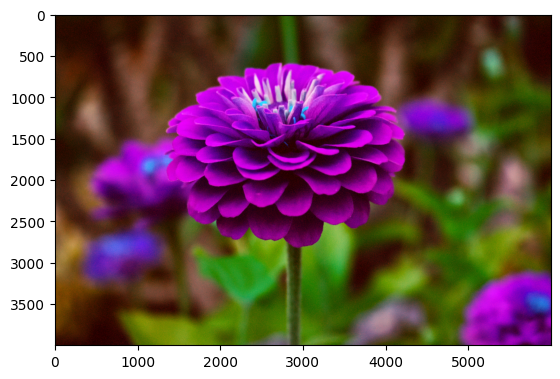

In [46]:
plt.imshow(image_noise_gauss)

In [47]:
#Постоянный шум

In [48]:
noise_intensity = 100
noise = np.full_like(image, noise_intensity, dtype=np.int16)
    
# Добавляем шум к изображению
noisy_image = image.astype(np.int16) + noise
    
# Обеспечиваем, чтобы значения пикселей оставались в диапазоне [0, 255]
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

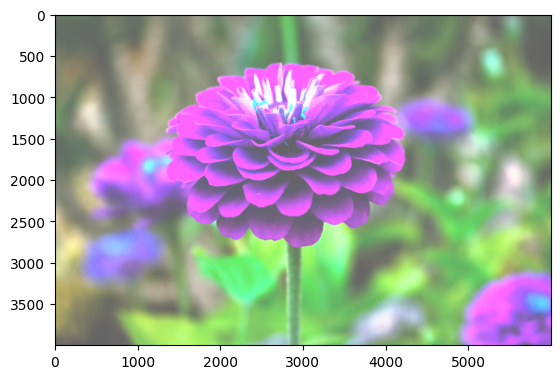

In [49]:
plt.imshow(noisy_image)

In [54]:
#Noise salt and pepper

In [55]:
image_sp = copy.deepcopy(image)
image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

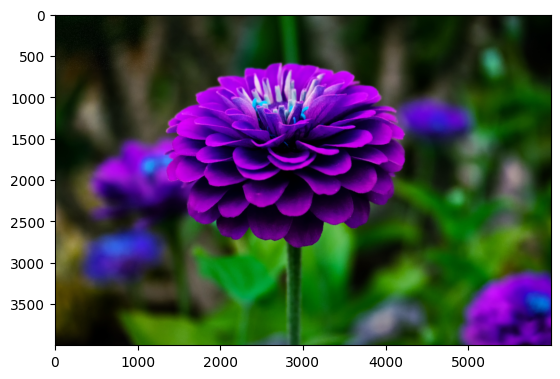

In [56]:
plt.imshow(image_sp)

In [116]:
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.

In [117]:
#Создание массива для хранения результатов среднеквадратической ошибки:
MSE = []
#Создание массива для хранения результатов индекса структурного свойства:
SSIM = []

In [118]:
# Медианный фильтр

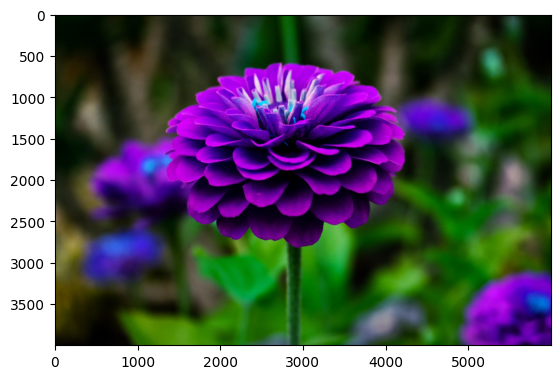

In [119]:
image_sp_median = cv2.medianBlur(image_sp, 3) #медианный фильтр с шумом соль-перец
plt.imshow(image_sp_median)

In [120]:
min_dim = min(image.shape[:2]) #берем минимум между 7 и размером изображения
win_size = min(7, min_dim)

mse_sp = mean_squared_error(image, image_sp_median)
(ssim_sp, diff) = structural_similarity(image, image_sp_median, win_size=win_size, full=True, channel_axis=-1)
MSE.append(mse_sp)
SSIM.append(ssim_sp)
print(f"Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: {mse_sp}")
print(f"Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: {ssim_sp}")

Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: 7.739155666666667
Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: 0.9096913713443038


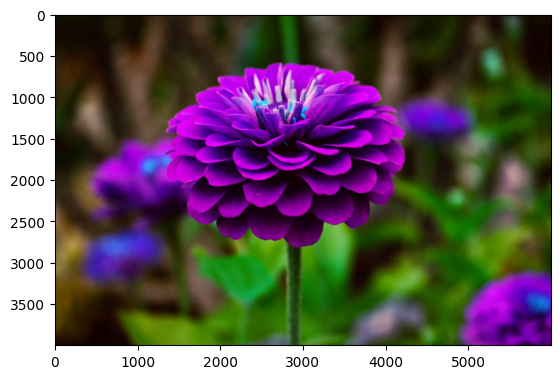

In [121]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3) #медианный фильтр с шумом гаусса
plt.imshow(image_gauss_median)

In [122]:
min_dim = min(image.shape[:2]) #берем минимум между 7 и размером изображения
win_size = min(7, min_dim)

mse_sp = mean_squared_error(image, image_gauss_median)
(ssim_sp, diff) = structural_similarity(image, image_gauss_median, win_size=win_size, full=True, channel_axis=-1)
MSE.append(mse_sp)
SSIM.append(ssim_sp)
print(f"Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: {mse_sp}")
print(f"Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: {ssim_sp}")

Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: 284.1648877916667
Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: 0.657842072102193


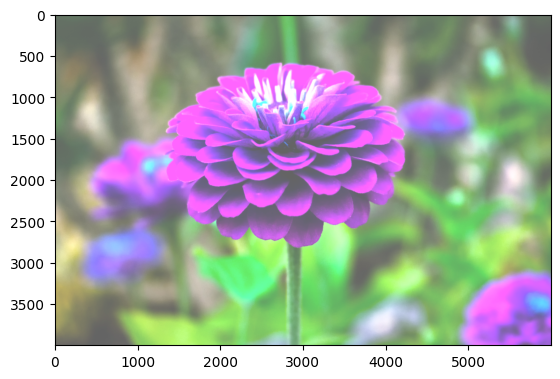

In [123]:
image_noisy_median = cv2.medianBlur(noisy_image, 3) #медианный фильтр постоянным шумом
plt.imshow(image_noisy_median)

In [124]:
min_dim = min(image.shape[:2]) #берем минимум между 7 и размером изображения
win_size = min(7, min_dim)

mse_sp = mean_squared_error(image, image_noisy_median)
(ssim_sp, diff) = structural_similarity(image, image_noisy_median, win_size=win_size, full=True, channel_axis=-1)
MSE.append(mse_sp)
SSIM.append(ssim_sp)
print(f"Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: {mse_sp}")
print(f"Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: {ssim_sp}")

Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: 9544.375426902778
Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: 0.4218056970612893


In [125]:
# Фильтр Гаусса

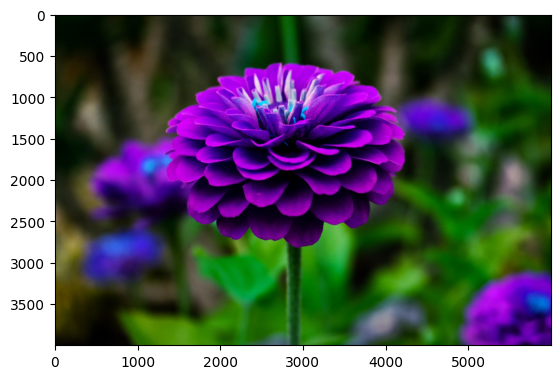

In [126]:
image_gauss_sp = cv2.GaussianBlur(image_sp,(5,5),0)
plt.imshow(image_sp_median)

In [127]:
min_dim = min(image.shape[:2]) #берем минимум между 7 и размером изображения
win_size = min(7, min_dim)

mse_sp = mean_squared_error(image, image_sp_median)
(ssim_sp, diff) = structural_similarity(image, image_sp_median, win_size=win_size, full=True, channel_axis=-1)
MSE.append(mse_sp)
SSIM.append(ssim_sp)
print(f"Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: {mse_sp}")
print(f"Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: {ssim_sp}")

Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: 7.739155666666667
Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: 0.9096913713443038


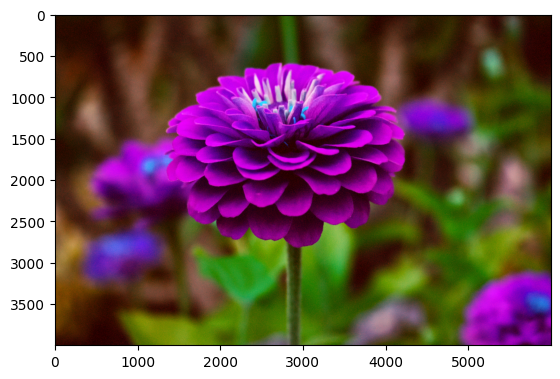

In [128]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)
plt.imshow(image_noise_gauss)

In [129]:
min_dim = min(image.shape[:2]) #берем минимум между 7 и размером изображения
win_size = min(7, min_dim)

mse_sp = mean_squared_error(image, image_noise_gauss)
(ssim_sp, diff) = structural_similarity(image, image_noise_gauss, win_size=win_size, full=True, channel_axis=-1)
MSE.append(mse_sp)
SSIM.append(ssim_sp)
print(f"Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: {mse_sp}")
print(f"Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: {ssim_sp}")

Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: 1464.4187835277778
Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: 0.6767613525293275


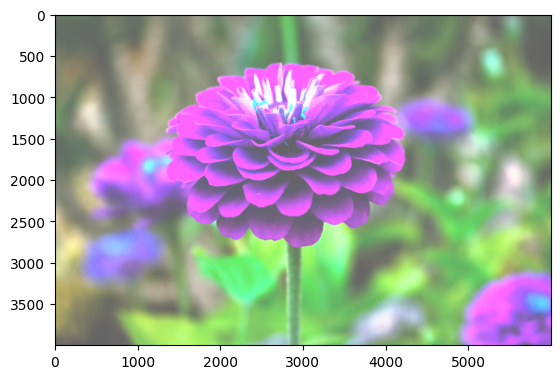

In [130]:
image_gauss_noisy = cv2.GaussianBlur(noisy_image,(5,5),0)
plt.imshow(noisy_image)

In [131]:
min_dim = min(image.shape[:2]) #берем минимум между 7 и размером изображения
win_size = min(7, min_dim)

mse_sp = mean_squared_error(image, image_gauss_noisy)
(ssim_sp, diff) = structural_similarity(image, image_gauss_noisy, win_size=win_size, full=True, channel_axis=-1)
MSE.append(mse_sp)
SSIM.append(ssim_sp)
print(f"Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: {mse_sp}")
print(f"Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: {ssim_sp}")

Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: 9558.924613833333
Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: 0.42038416933475875


In [132]:
#Билатериальный фильтр

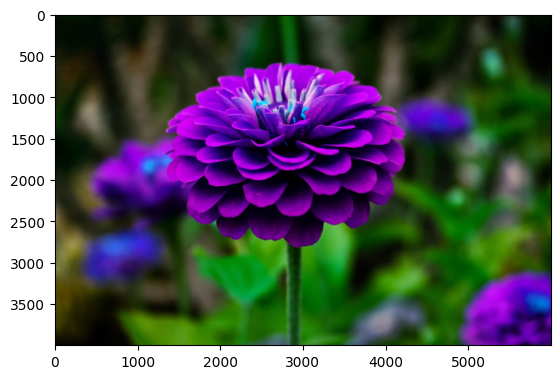

In [133]:
image_sp_bilat = cv2.bilateralFilter(image_sp,9,75,75)
plt.imshow(image_sp_bilat)

In [134]:
min_dim = min(image.shape[:2]) #берем минимум между 7 и размером изображения
win_size = min(7, min_dim)

mse_sp = mean_squared_error(image, image_sp_bilat)
(ssim_sp, diff) = structural_similarity(image, image_sp_bilat, win_size=win_size, full=True, channel_axis=-1)
MSE.append(mse_sp)
SSIM.append(ssim_sp)
print(f"Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: {mse_sp}")
print(f"Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: {ssim_sp}")

Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: 30.234339972222223
Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: 0.8519459716816767


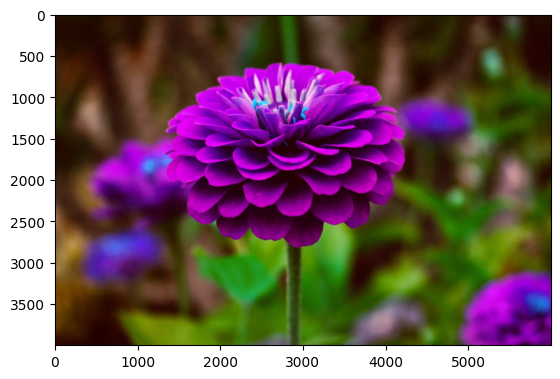

In [135]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)
plt.imshow(image_gauss_bilat)

In [136]:
min_dim = min(image.shape[:2]) #берем минимум между 7 и размером изображения
win_size = min(7, min_dim)

mse_sp = mean_squared_error(image, image_gauss_bilat)
(ssim_sp, diff) = structural_similarity(image, image_gauss_bilat, win_size=win_size, full=True, channel_axis=-1)
MSE.append(mse_sp)
SSIM.append(ssim_sp)
print(f"Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: {mse_sp}")
print(f"Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: {ssim_sp}")

Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: 617.6650120277778
Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: 0.620881701756044


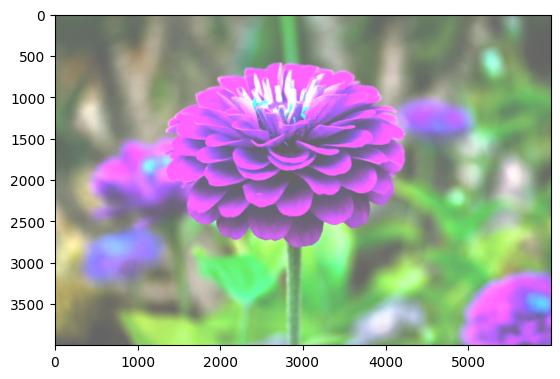

In [137]:
image_noisy_bilat = cv2.bilateralFilter(noisy_image,9,75,75)
plt.imshow(image_noisy_bilat)

In [138]:
min_dim = min(image.shape[:2]) #берем минимум между 7 и размером изображения
win_size = min(7, min_dim)

mse_sp = mean_squared_error(image, image_noisy_bilat)
(ssim_sp, diff) = structural_similarity(image, image_noisy_bilat, win_size=win_size, full=True, channel_axis=-1)
MSE.append(mse_sp)
SSIM.append(ssim_sp)
print(f"Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: {mse_sp}")
print(f"Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: {ssim_sp}")

Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: 9561.413491333333
Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: 0.39743313809102654


In [139]:
#Фильтр нелокальных средних

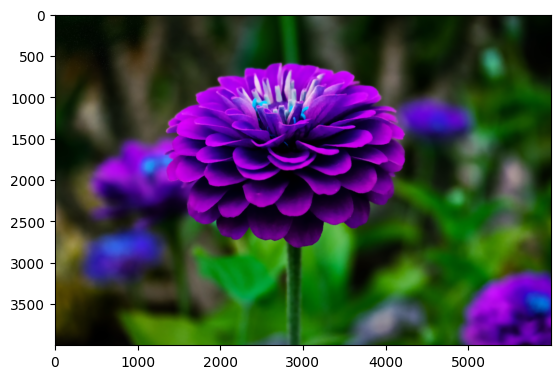

In [140]:
image_sp_nlm = cv2.fastNlMeansDenoising(image_sp, h = 20)
plt.imshow(image_sp_nlm)

In [141]:
min_dim = min(image.shape[:2]) #берем минимум между 7 и размером изображения
win_size = min(7, min_dim)

mse_sp = mean_squared_error(image, image_sp_nlm)
(ssim_sp, diff) = structural_similarity(image, image_sp_nlm, win_size=win_size, full=True, channel_axis=-1)
MSE.append(mse_sp)
SSIM.append(ssim_sp)
print(f"Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: {mse_sp}")
print(f"Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: {ssim_sp}")

Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: 17.824611583333333
Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: 0.8398168508535235


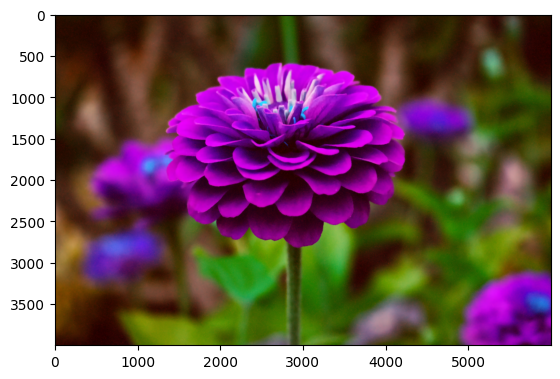

In [142]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)
plt.imshow(image_gauss_nlm)

In [143]:
min_dim = min(image.shape[:2]) #берем минимум между 7 и размером изображения
win_size = min(7, min_dim)

mse_sp = mean_squared_error(image, image_gauss_nlm)
(ssim_sp, diff) = structural_similarity(image, image_gauss_nlm, win_size=win_size, full=True, channel_axis=-1)
MSE.append(mse_sp)
SSIM.append(ssim_sp)
print(f"Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: {mse_sp}")
print(f"Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: {ssim_sp}")

Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: 610.2936717083334
Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: 0.6755809222558838


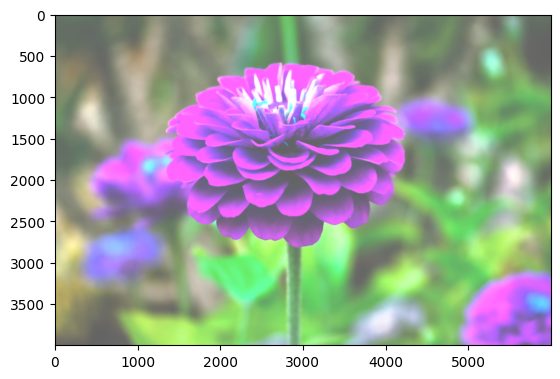

In [144]:
image_noisy_nlm = cv2.fastNlMeansDenoising(noisy_image, h = 20)
plt.imshow(image_noisy_nlm)

In [145]:
min_dim = min(image.shape[:2]) #берем минимум между 7 и размером изображения
win_size = min(7, min_dim)

mse_sp = mean_squared_error(image, image_noisy_nlm)
(ssim_sp, diff) = structural_similarity(image, image_noisy_nlm, win_size=win_size, full=True, channel_axis=-1)
MSE.append(mse_sp)
SSIM.append(ssim_sp)
print(f"Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: {mse_sp}")
print(f"Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: {ssim_sp}")

Результаты MSE (Mean Squared Error) - Среднеквадратическая ошибка: 9561.80640873611
Результаты SSIM (Structural Similarity Index) - Индекс структурного сходства: 0.38991431664876375


In [146]:
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [147]:
# Вычисляем средние для группы MSE
avg1 = sum(MSE[0:3]) / 3  # Элементы 1-3 (индексы 0-2)
avg2 = sum(MSE[3:6]) / 3  # Элементы 4-6 (индексы 3-5)
avg3 = sum(MSE[6:9]) / 3  # Элементы 7-9 (индексы 6-8)
avg4 = sum(MSE[9:12]) / 3 # Элементы 10-12 (индексы 9-11)

# Добавляем все средние в новый массив
averages_MSE = [avg1, avg2, avg3, avg4]

In [148]:
# Вычисляем средние для группы SSIM
avg1 = sum(SSIM[0:3]) / 3  # Элементы 1-3 (индексы 0-2)
avg2 = sum(SSIM[3:6]) / 3  # Элементы 4-6 (индексы 3-5)
avg3 = sum(SSIM[6:9]) / 3  # Элементы 7-9 (индексы 6-8)
avg4 = sum(SSIM[9:12]) / 3 # Элементы 10-12 (индексы 9-11)

# Добавляем все средние в новый массив
averages_SSIM = [avg1, avg2, avg3, avg4]

In [149]:
minimum_mse = min(averages_MSE) #0 - изображения идентичны Чем больше MSE, тем больше различий между изображениями

In [155]:
maximum_ssim = max(averages_SSIM)  #1 - изображения идентичны Обычно: SSIM > 0.9 считается хорошим качеством

In [156]:
if minimum_mse == averages_MSE[0]: print(f"По критерию MSE лучший фильтр - медианный, его среднее значение: {minimum_mse}")
if minimum_mse == averages_MSE[1]: print(f"По критерию MSE лучший фильтр - гаусса, его среднее значение: {minimum_mse}")
if minimum_mse == averages_MSE[2]: print(f"По критерию MSE лучший фильтр - билатериальный, его среднее значение: {minimum_mse}")
if minimum_mse == averages_MSE[3]: print(f"По критерию MSE лучший фильтр - нелокальных средних, его среднее значение: {minimum_mse}")

По критерию MSE лучший фильтр - медианный, его среднее значение: 3278.7598234537036


In [157]:
if maximum_ssim == averages_SSIM[0]: print(f"По критерию SSIM лучший фильтр - медианный, его среднее значение: {maximum_ssim}")
if maximum_ssim == averages_SSIM[1]: print(f"По критерию SSIM лучший фильтр - гаусса, его среднее значение: {maximum_ssim}")
if maximum_ssim == averages_SSIM[2]: print(f"По критерию SSIM лучший фильтр - билатериальный, его среднее значение: {maximum_ssim}")
if maximum_ssim == averages_SSIM[3]: print(f"По критерию SSIM лучший фильтр - нелокальных средних, его среднее значение: {maximum_ssim}")

По критерию SSIM лучший фильтр - гаусса, его среднее значение: 0.6689456310694633
